# <center> Diabetes Prediction Analysis<center>
### <center>Internship Project 2 at [MeriSKILL](https://www.linkedin.com/company/meriskill/)<center>

> Author/Analyst : Samrat Kundu  
> LinkedIn : https://www.linkedin.com/in/samratk97/

# Table of Contents

1. [Import Libraries / Modules.](#1)
2. [Import and Analyze the Data.](#2)  
3. [Exploratory Data Analysis.](#3)  

  3.1. [Outcome Column  ](#3.1)  
  3.2. [Pregnancies Column  ](#3.2)  
  3.3. [Glucose Column  ](#3.3)  
  3.4. [Blood Pressure Column  ](#3.4)  
  3.5. [Skin Thickness Column  ](#3.5)  
  3.6. [Insulin Column  ](#3.6)  
  3.7. [Diabetes Pedigree Function  ](#3.7)  
  3.8. [Age Column  ](#3.8)  

4. [Outlier Analysis](#4)  
5. [Correlation Analysis](#5)  
6. [Additional Cleaning](#6)  
7. [Data Preprocessing - Imputing Missing Values](#7)  
8. [Model Evaluation with Default](#8)  
  
  8.1. [Setting Up the Pipeline Object  ](#8.1)  
  8.2. [Cross Validation](#8.2)  

9. [GOAL of the Model](#9)  
10. [Feature Engineering](#10)  
11. [Balance the Class Distribution](#11)  
12. [Hyper-Parameter Tuning](#12)  

  12.1. [Random Forest Classifier  ](#12.1)  
  12.2. [Gradient Boosting Classifier](#12.2)  

13. [Confusion Matrix](#13)  
14. [ROC - AUC Analysis](#14)  
15. [Model Improvement](#15)  

 15.1. [Feature Importance Analysis](#15.1)  
 15.2. [Model Training](#15.2)  

16. [Highlights of Insights](#16)  
17. [Insights on Model Prediction.](#17)  


<a name='1'></a>
# Import Libraries / Modules

In [58]:
# To Analyze and Manipulate the data
import pandas as pd
import numpy as np

# To Visualize the Data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
from scipy.stats import uniform, randint

# Pipeline objects: Sclaer, Preprocessor, Imputer, Sampler, imblearn
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbalancedPipeline

# Classifiers
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV

# Model metrics
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score


# To prevent WARNINGS!
import warnings
warnings.filterwarnings('ignore')

# Setting up the Global random seed
np.random.seed(0)

<a name='2'></a>
# Import and Analyze the Data

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
# Dimension of the data
print('# Columns : ',df.shape[1])
print('# Rows : ',df.shape[0])

# Columns :  9
# Rows :  768


In [4]:
# Columns Names
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# first five rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# last five rows
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
# Columns Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<font size=4>**About the Data**</font>

<p>Based on the information provided earlier, it appears that the dataset does not contain any null values. Now, let's delve into more details about each of the individual columns in the dataset..</p>

1. `Pregnancies`: This feature represents the number of times a person has been pregnant.
2. `Glucose`:  Glucose is the concentration of glucose (sugar) in the blood, typically measured in milligrams per deciliter (mg/dL). High glucose levels can be an indicator of diabetes, as it suggests the body is not effectively regulating blood sugar.
3. `BloodPressure`: This feature represents the blood pressure of the individual, typically measured in millimeters of mercury (mm Hg).
4. `SkinThickness`: This is a measure of the thickness of the skinfold on the triceps (back of the arm) and is usually measured in millimeters.
5. `Insulin`: Insulin is a hormone produced by the pancreas that regulates blood sugar. This feature represents the insulin levels in the blood, typically measured in microinternational units per milliliter (μIU/mL). Low insulin levels may indicate diabetes.
6. `BMI`: BMI is a numerical value calculated from a person's weight and height. It's used to categorize individuals into different weight categories, such as underweight, normal weight, overweight, or obese. High BMI is often associated with a higher risk of diabetes.
7. `DiabetesPedigreeFunction`: This is a numeric score that represents the likelihood of diabetes based on family history. It's used to assess the genetic predisposition to diabetes.
8. `Age`: The Age of an Individual.
9. `Outcome`: This column represents whether the person have <font color='red'>diabetes (1)</font> or <font color='green'>Not (0)</font>. This is also going to be the `Predictor Variable` in this analysis.

<a name='3'></a>
# Exploratory Data Analysis

<a name='3.1'></a>
## `Outcome` Column

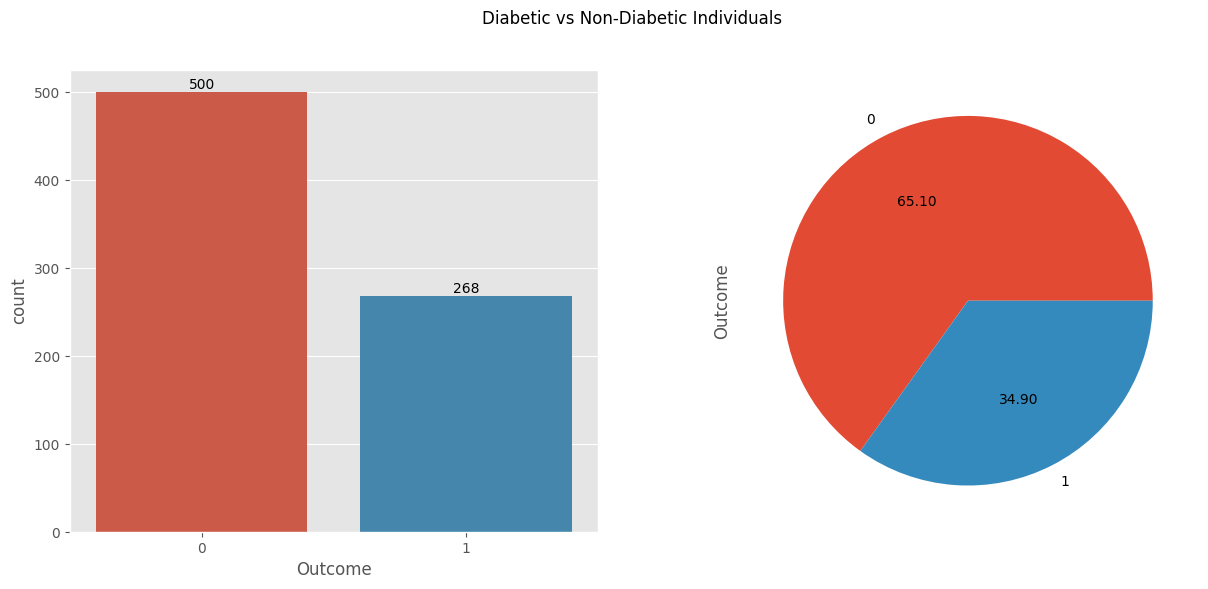

In [8]:
# check the distribution of Diabetic and Non-Diabetic individuals
fig, axis = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Diabetic vs Non-Diabetic Individuals')
ax = sns.countplot(data=df, x='Outcome', ax=axis[0])
for container in ax.containers:
    ax.bar_label(container)
df.Outcome.value_counts().plot.pie(autopct='%.2F', ax=axis[1]);

<font size=4>**Insights:**</font>

- Out of total data, there are 500 indivuals being Non-Dibetic and 268 individuals being Diabetic.
- This class distribution reveals an imbalance, with approximately 65% of individuals being non-diabetic and around 35% being diabetic.
- Recognizing this class imbalance, it's crucial to delve deeper into the data before proceeding with model implementation.
- With this understanding of the class distribution, let's now embark on an Exploratory Data Analysis (EDA) journey, where we will examine each feature's relationship with the "Outcome" variable.

<a name='3.2'></a>
## `Pregnacies` Column

In [9]:
# check the values and counts
df.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

> Pregnancies vs Diabetes

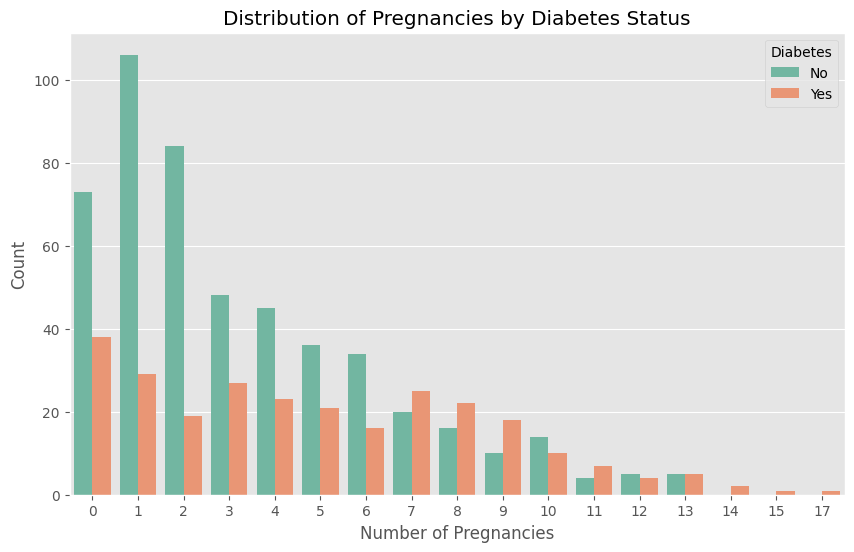

In [10]:
# Create a bar plot to show the distribution of pregnancies among individuals with and without diabetes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pregnancies', hue='Outcome', palette='Set2')
plt.title('Distribution of Pregnancies by Diabetes Status')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['No', 'Yes'])
plt.show()

<font size=4>**Insights:**</font>

<p>After a thorough examination of the 'Pregnancies' column in our dataset, several noteworthy observations have emerged:</p>

- `Range of Pregnancies`: The 'Pregnancies' column spans a range from 0 to 17, reflecting a wide spectrum of pregnancy histories among the individuals in our dataset.

- `Zero Pregnancies`: Remarkably, we identified 111 women within our dataset who have not experienced pregnancy, representing a significant portion of the population. However, around 50% of the propotion of Zero Pregnancies having diabetes.

- `Majority with One and two Pregnancy`: Surprisingly, the majority of women in our dataset have been pregnant just once (135 women) or twice(103) and most of the are not Diabetic This observation highlights a common trend among our study population.

- `Extreme Values`: While the dataset predominantly consists of women with a lower number of pregnancies, it is noteworthy that there are extreme values as well. For instance, one woman has a record of 17 pregnancies, and there are others with substantial numbers, including 15, 14, 12, and so forth. Pregnacy value more than 7 indicating more chances of having Diabetes except for the values 10, 12, and 13(quite balanced). These extreme cases warrant closer examination and could potentially play a significant role in our analysis of diabetes risk factors.

<a name='3.3'></a>
## `Glucose` column

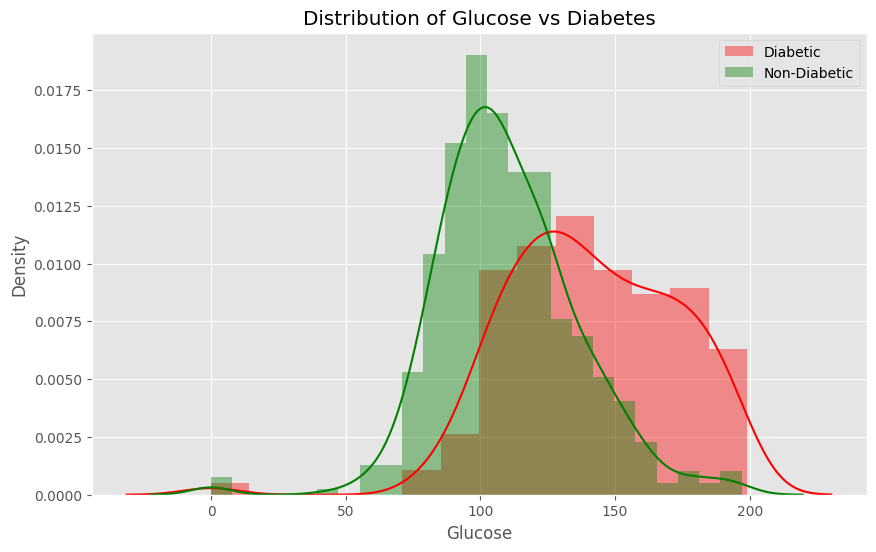

In [11]:
# check the distribution of Glucose vs diabetes
plt.figure(figsize=(10, 6))
sns.distplot(df[df['Outcome'] == 1]['Glucose'], label='Diabetic', color='r')
sns.distplot(df[df['Outcome'] == 0]['Glucose'], label='Non-Diabetic', color='g')
plt.title('Distribution of Glucose vs Diabetes')
plt.legend();

<font size=4>**Insights**:</font>

- `Distribution Among Diabetic Individuals`: The distribution of glucose levels among individuals diagnosed with diabetes exhibits a left-skewed pattern. A significant portion of this population falls within the glucose range of 125 to 200, indicating that higher glucose levels are associated with diabetes diagnosis.
  
- `Distribution Among Non-Diabetic Individuals`: In contrast, the distribution of glucose levels among non-diabetic individuals appears almost normal, with a minor peak at a glucose level of 0. However, this peak at 0 suggests a potential issue, such as missing data or reporting anomalies.
  
- `Glucose Label 0 in Both Groups`: The presence of glucose label 0 in both diabetic and non-diabetic patients raises questions. It may indicate that some patients either never received a glucose label report or that there is missing data for this specific measurement.
  
- `Majority of Glucose Label 0 in Non-Diabetic Group`: Intriguingly, within the subset of individuals with a glucose label of 0, the majority are non-diabetic. This observation suggests that while glucose label 0 is unusual, it is not necessarily indicative of diabetes.
  
- `Higher Density Around Glucose Level 100 in Non-Diabetic Group`: A notable finding is the higher density of glucose levels around 100 among non-diabetic individuals. This suggests that a significant portion of the population with glucose levels around 100 does not receive a diabetes diagnosis.

<a name='3.4'></a>
## `BloodPressure` Column

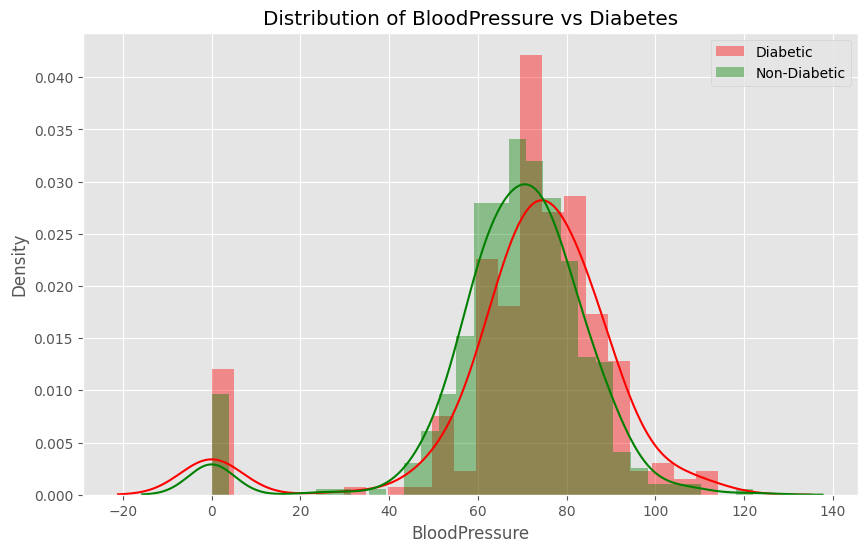

In [12]:
# check the distribution of BloodPressure vs diabetes
plt.figure(figsize=(10, 6))
sns.distplot(df[df['Outcome'] == 1]['BloodPressure'], label='Diabetic', color='r')
sns.distplot(df[df['Outcome'] == 0]['BloodPressure'], label='Non-Diabetic', color='g')
plt.title('Distribution of BloodPressure vs Diabetes')
plt.legend();

<font size=4>**Insights**:</font>

- `Type of Distribution`: Based on the plot for both Diabetic and Non-Diabetic individuals, it can be conclude that the distribution is in Normal/Gaussian pattern. However, there is a similar patten at lebel 0 like we saw in Glucose prevously.
  
- `BloodPressure Label 0 in Both Groups`: Similarly, the presence of BloodPressure label 0 in both diabetic and non-diabetic patients may indicate that some patients either never received a glucose label report or that there is missing data for this specific measurement.
  
- `Noticeable Peak for Diabetic Group`: Intriguingly, within the subset of individuals with a Blood Pressure label around 70, the majority are diabetic, along with other peaks in the range of 80 to 120. This is a potential information showcasing positive correlation at higher Blood Pressure with Outcome meaning that the Individuals with Blood Pressure lebel 70 and higher will most likely to diagnosed with Diabetes.

<a name='3.5'></a>
## `SkinThickness` Column

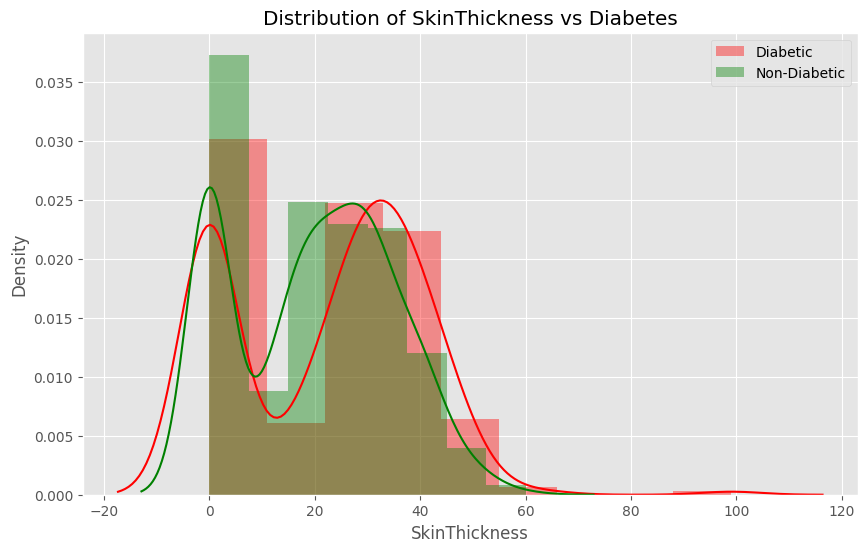

In [13]:
# check the distribution of SkinThickness vs diabetes
plt.figure(figsize=(10, 6))
sns.distplot(df[df['Outcome'] == 1]['SkinThickness'], label='Diabetic', color='r')
sns.distplot(df[df['Outcome'] == 0]['SkinThickness'], label='Non-Diabetic', color='g')
plt.title('Distribution of SkinThickness vs Diabetes')
plt.legend();

<font size=4>**Insights**:</font>

- `Type of Distribution`: Based on the plot for both Diabetic and Non-Diabetic individuals, it can be concluded that the distribution is bimodal, including the label 0. There is also a noticeable tail on the right-hand side.
  
- `Label 0 in Both Groups`: Once again, the presence of Label 0 in both groups suggests potential medical anomalies or missing data. Within this distribution, individuals with Skin Thickness labels around 0 to 10 are predominantly not diabetic.
  
- `Noticeable Peak`: EExcept for the peak at zero, there isn't any other pronounced peak. The Skin Thickness labels, ranging from around 22 onwards, are associated with a higher prevalence of diabetes. Additionally, there is a right tail in this distribution, including certain outliers around 70, all of which correspond to individuals with diabetes.

<a name='3.6'></a>
## `Insulin` Column

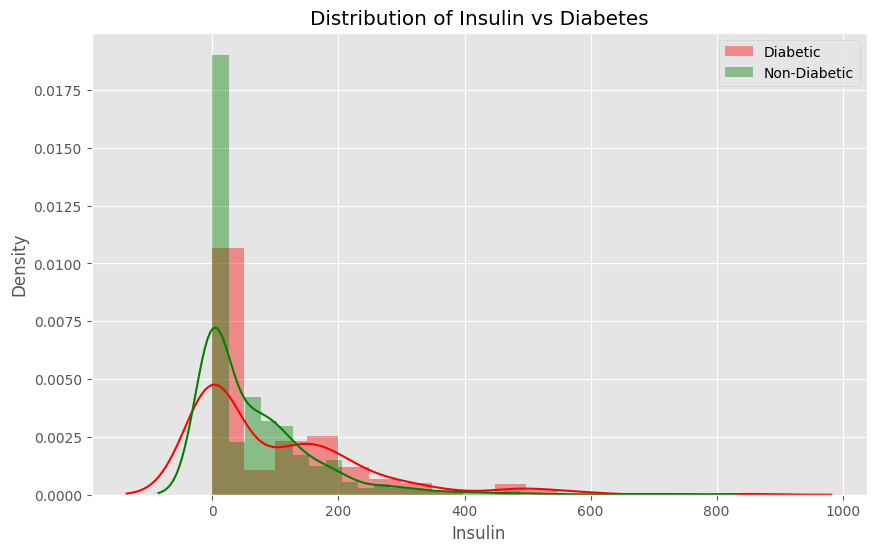

In [14]:
# check the distribution of Insulin vs diabetes
plt.figure(figsize=(10, 6))
sns.distplot(df[df['Outcome'] == 1]['Insulin'], label='Diabetic', color='r')
sns.distplot(df[df['Outcome'] == 0]['Insulin'], label='Non-Diabetic', color='g')
plt.title('Distribution of Insulin vs Diabetes')
plt.legend();

<font size=4>**Insights**:</font>

- `Type of Distribution`: Insulin distribution for both diabetic and non-diabetic patients is right-skewed, indicating potential outliers.
  
- `Label 0 in Both Groups`: Both diabetic and non-diabetic patients have Insulin labels of 0, suggesting possible medical anomalies or missing data.

- `Noticeable Peak`: In the Insulin distribution, a significant number of data points cluster around 0, with most of them being non-diabetic. Additionally, diabetic patients are more prevalent in the range of Insulin labels above 150, while non-diabetic patients are more common around Insulin label 100. Outliers are present in higher Insulin label ranges for both groups.

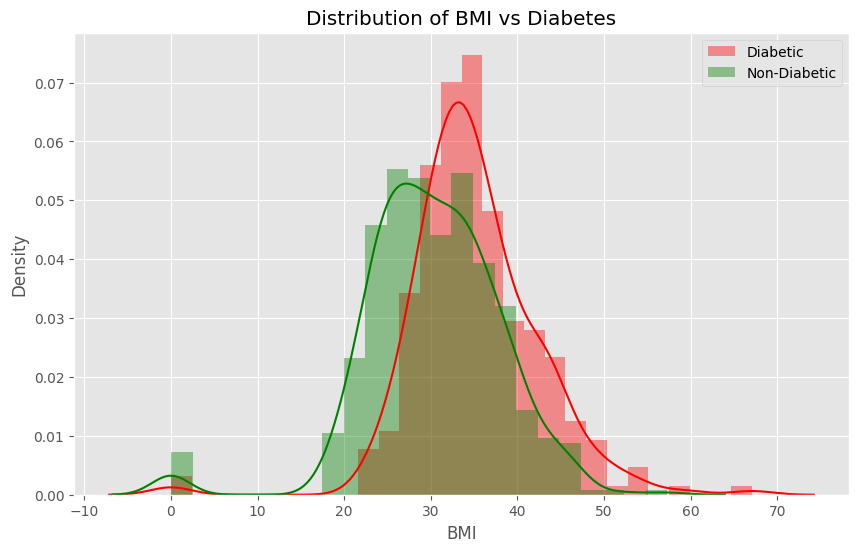

In [15]:
# check the distribution of BMI vs diabetes
plt.figure(figsize=(10, 6))
sns.distplot(df[df['Outcome'] == 1]['BMI'], label='Diabetic', color='r')
sns.distplot(df[df['Outcome'] == 0]['BMI'], label='Non-Diabetic', color='g')
plt.title('Distribution of BMI vs Diabetes')
plt.legend();

<font size=4>**Insights**:</font>

- `Type of Distribution`: Insulin distribution for both diabetic and non-diabetic patients appears almost normal but might have potential outliers.
  
- `Label 0 in Both Groups`: Both diabetic and non-diabetic patients have BMI labels of 0, suggesting possible medical anomalies or missing data, with a majority being Non-Diabetic.

- `Noticeable Peak for Diabetic Group`: The most noticeable BMI peak falls in the range of 30 to 40, primarily among diabetic patients. Non-diabetic patients tend to have BMI values just below 28. Overall, a BMI of around 28 or higher appears to carry a higher risk of diabetes diagnosis in this dataset, with many diabetic patients falling into the obese category, irrespective of outliers.

<a name='3.7'></a>
## `Diabetes Pedigree Function` Column

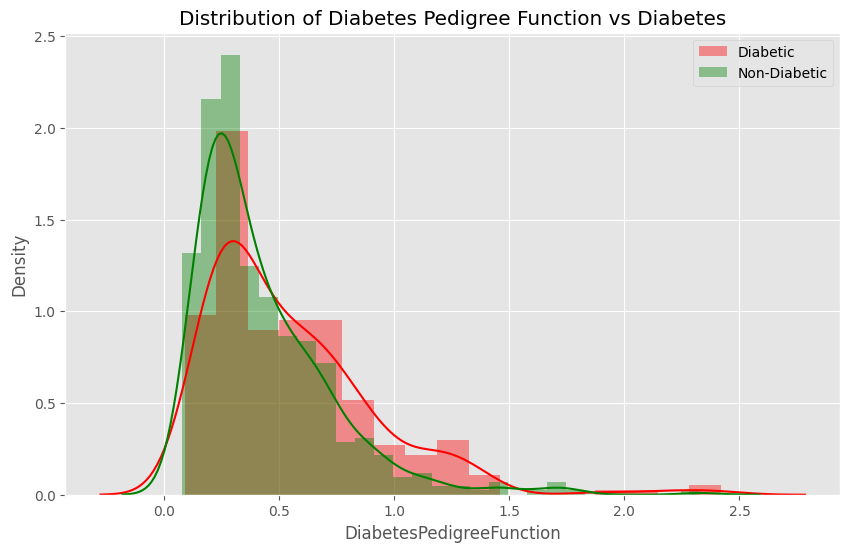

In [16]:
# check the distribution of DiabetesPedigreeFunction vs diabetes
plt.figure(figsize=(10, 6))
sns.distplot(df[df['Outcome'] == 1]['DiabetesPedigreeFunction'], label='Diabetic', color='r')
sns.distplot(df[df['Outcome'] == 0]['DiabetesPedigreeFunction'], label='Non-Diabetic', color='g')
plt.title('Distribution of Diabetes Pedigree Function vs Diabetes')
plt.legend();

<font size=4>**Insights**:</font>

- `Type of Distribution`: The Diabetes Pedigree Function (DPF) distribution for both diabetic and non-diabetic patients appears right-skewed, indicating that higher DPF values are associated with a higher genetic risk of diabetes.
  
- `Distribution of Non-Diabetic Group`: In the non-diabetic group, there is a noticeable peak around 0.25 on the DPF scale, which is towards the lower end of the total DPF range (0 to 2.5). Lower DPF values in this group suggest a lower genetic risk of diabetes, although there are a few non-diabetic patients with higher DPF values.

- `Distribution of Diabetic Group`: The diabetic group exhibits a different pattern. Many diabetic patients have DPF values of 0.5 and higher, indicating a higher genetic risk as an important factor in diabetes diagnosis.  

- `Additional Observation`: Notably, there is a high density of diabetic patients with DPF around 0.25. This observation suggests that genetic risk, while important, is not the sole factor influencing diabetes diagnosis, indicating the presence of other contributing factors.

<a name='3.8'></a>
## `Age` Column

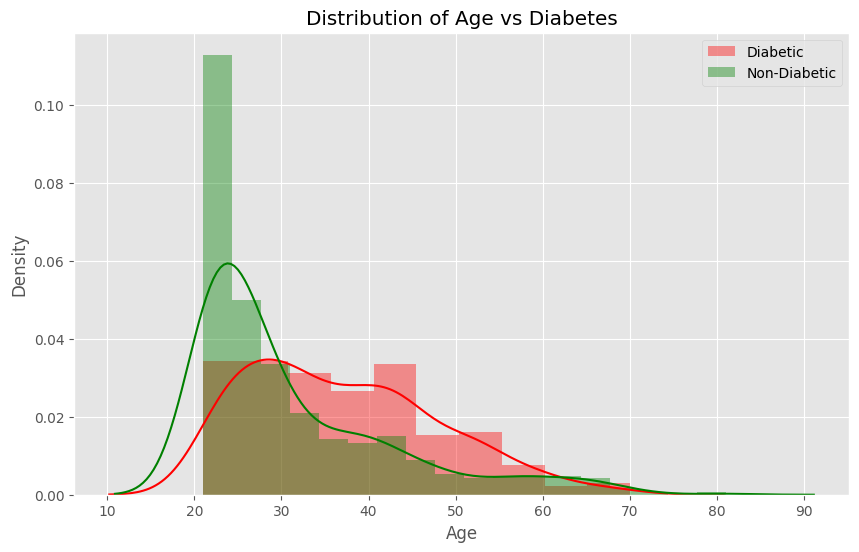

In [17]:
# check the distribution of Age vs diabetes
plt.figure(figsize=(10, 6))
sns.distplot(df[df['Outcome'] == 1]['Age'], label='Diabetic', color='r')
sns.distplot(df[df['Outcome'] == 0]['Age'], label='Non-Diabetic', color='g')
plt.title('Distribution of Age vs Diabetes')
plt.legend();

<font size=4>**Insights**:</font>

- `Type of Distribution`: The Age distribution for non-diabetic patients appears right-skewed, while for diabetic patients, it exhibits an almost bimodal pattern. The majority of data points fall within the range of 21-28.
  
- `Distribution of Non-Diabetic Group`: Within the non-diabetic group, there is a concentration of data points in the 21-28 age range, with a notable peak between 21-25, indicating that most individuals in the dataset are young adults.

- `Distribution of Diabetic Group`: While there are a few diabetic individuals aged 20-30, a significant shift occurs after the age of 30. At this point, there is a noticeable divergence between the diabetic and non-diabetic groups. Non-diabetic individuals decrease in number, while the diabetic group becomes more dominant.

- `Additional Observation`: Notably, there are a few older individuals who have not been diagnosed with diabetes. However, in the diabetic group, the distribution is more concentrated around age 70.

<a name='4'></a>
# Outliers Analysis

In [18]:
# getting the statistical view of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


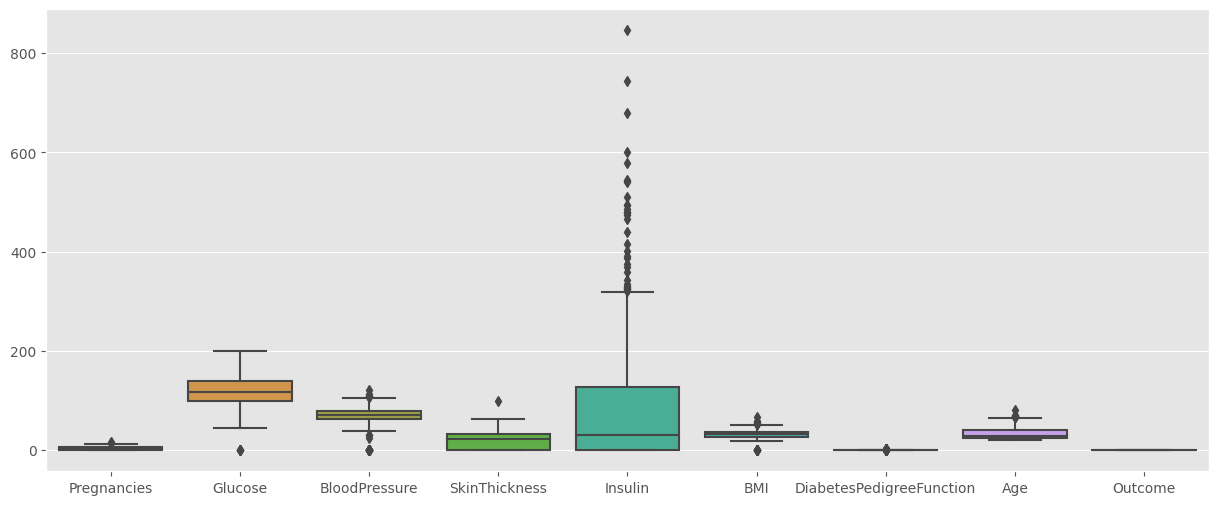

In [19]:
# creating box plot for each column to check outliers
plt.figure(figsize=(15,6))
sns.boxplot(df);

<font size=4>**Insights:**</font>

- Except for the `Pregnancies` column, treated as categorical, and the `Outcome` column, which serves as the target variable, all the features exhibit outliers.

- `Insulin` column has the highest outliers followed by `BloodPressure`, `BMI`, `Age`, `SkinThickness`, and `Glucose`.

<font size=4>**Agenda:**</font>

- To deal with this Outliers we will use `Robust Scaler` in the pipeline to shape and scale all the features automatically.

<a name='5'></a>
# Correlation Analysis

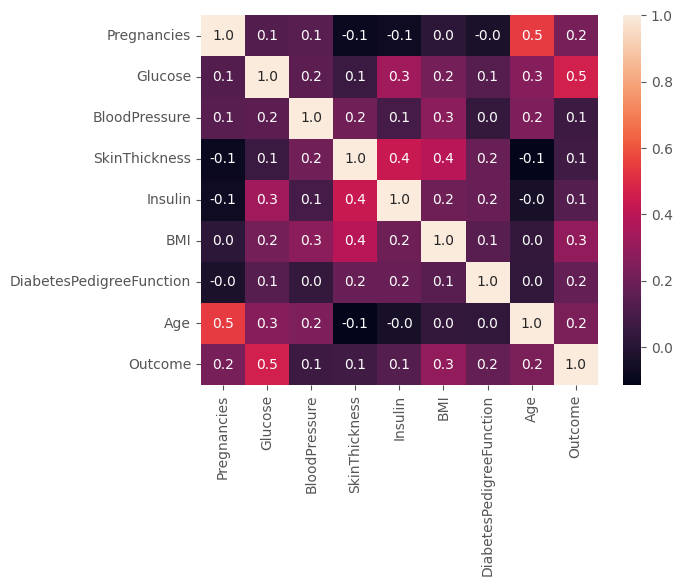

In [20]:
sns.heatmap(df.corr(), annot=True, fmt='.1F');

<font size=4>**Insights:**</font>

- **Collinearity:** All the features have positive correlation with the target `Outcome`.
    - Glucose: 0.5
    - BMI: 0.3
    - Age: 0.2
    - Pregnancies: 0.2
    - DiabetesPedigreeFunction: 0.2
    - Insulin, SkinThickness, BloodPressure: 0.1 each  

- **Multi-Collinearity:** There is evidence of potential multicollinearity between certain features. For instance,
    - `Pregnancies` and `Age`: 0.5
    - `SkinThickness` and `Insulin`: 0.5.
    - `SkinThickness` and `BMI`: 0.4
      
- **Explanation:** Correlation values indicates the degree of linear relationship between columns. A higher values suggests a stronger linear relationship, while a lower value indicates a weaker relationship.

- **Impact:** Multicollinearity bewteen columns especially features, can make it challenging to determine the individual effect of each feature and can lead to model instability.

<p>To address this issue we will perform Feature Engineering later in this project.</p>

<a name='6'></a>
# Additional Cleaning

- Several features, including `Glucose`, `Blood Pressure`, `Skin Thickness`, `Insulin`, and `BMI`, have recorded values of 0, which are - typically not acceptable for these measurements.
- It's important to note that the presence of 0 in these features often signifies **medical anomalies** or **missing data**.
- Let's quantify the occurrences of these values for further analysis.

In [21]:
# Counting all the zeros for those features by slicing the the perticular columns
df[df == 0].count()[1:-3]

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

- Notably, both the `Insulin` and `SkinThickness` features exhibit a significant number of missing values, as previously identified through density analysis.
- While conventional statistical imputation methods can be applied effectively to features like `Glucose`, `BloodPressure`, and `BMI`, adopting the same approach for `SkinThickness` and `Insulin` may introduce undesirable bias into our models.
- To address this challenge, we can utilize scikit-learn's `IterativeImputer`, which employs an iterative approach to impute missing values based on relationships with other features. This method offers a more robust solution.
- In forthcoming experiments, we also have the flexibility to evaluate the impact of retaining or excluding the `SkinThickness` and `Insulin` features on overall model performance.

<a name='7'></a>
# Data Preprocessing - Imputing Missing Values

Split the Data into Features and Target

In [22]:
# Features
X = df.drop(columns='Outcome')
# Target
y = df.Outcome

Convert The Missing values to NaN and use Iterative Imputer

In [23]:
# Create a list of columns which have missing values
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace all the 0 to NaN
X[columns_to_impute] = X[columns_to_impute].replace(0, np.nan)

# Instantiate Iterative Imputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit and transform to the data with column_to_impute
X_imputed = imputer.fit_transform(X)

# Convert the result back to DataFrame with Column Names
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)



In [24]:
X_imputed

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.000000,218.922943,33.6,0.627,50.0
1,1.0,85.0,66.0,29.000000,70.302975,26.6,0.351,31.0
2,8.0,183.0,64.0,21.532622,268.502252,23.3,0.672,32.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0
764,2.0,122.0,70.0,27.000000,158.727965,36.8,0.340,27.0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0
766,1.0,126.0,60.0,27.881441,173.505948,30.1,0.349,47.0


<a name='8'></a>
# Model Evaluation (Default)

<a name='8.1'></a>
### Setting up the Pipeline Objects

In [25]:
# Instantiate the classifiers list
classifiers = [
    ("Logistic Regression", LogisticRegression(max_iter=1000, random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("Support Vector Machine", SVC(random_state=42)),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
]

# Define Imbalance Samplers
samplers = {
    "SMOTE": SMOTE(sampling_strategy='auto', random_state=0),
    "RandomOverSampler": RandomOverSampler(sampling_strategy='auto', random_state=0),
    "RandomUnderSampler": RandomUnderSampler(sampling_strategy='auto', random_state=0)
}

<a name='8.2'></a>
### Cross Validation

In [26]:
# Create a empty list for results
results_list = []

# Iterate over samplers
for sampler_name, sampler in samplers.items():
  # Iterate over classifiers
  for clf_name, clf in classifiers:

    # Resample the Dataset
    X_sampled, y_sampled = sampler.fit_resample(X_imputed, y)

    # Create a Pipeline with Scaler and Classifer
    pipe = Pipeline([
        ("scaler", RobustScaler()),
        ("classifier", clf)
    ])

    # Instantiate cross validation with X_sampled and y_sampled
    cv_score = cross_val_score(pipe, X_sampled, y_sampled, cv=5, scoring='accuracy')

    # Predict on cross validation
    y_pred = cross_val_predict(pipe, X_sampled, y_sampled, cv=5)

    # Compute the metrics: Mean Accuracy, Precision, Recall, F1-Score
    mean_accuracy = np.mean(cv_score)
    precision = precision_score(y_sampled, y_pred)
    recall = recall_score(y_sampled, y_pred)
    f1_score_value = f1_score(y_sampled, y_pred)

    # append the metrics into results_list
    results_list.append({
        "Classifier": clf_name,
        "Sampler": sampler_name,
        "Mean Accuracy": mean_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score_value
    })


# Store the results_list into a DataFrame
results_df = pd.DataFrame(results_list)

In [27]:
results_df.sort_values(by='Mean Accuracy', ascending=False)

,Classifier,Sampler,Mean Accuracy,Precision,Recall,F1-Score
6,Random Forest,RandomOverSampler,0.863000,0.827027,0.918000,0.870142
1,Random Forest,SMOTE,0.821000,0.801126,0.854000,0.826718
7,Gradient Boosting,RandomOverSampler,0.821000,0.785080,0.884000,0.831609
2,Gradient Boosting,SMOTE,0.792000,0.778626,0.816000,0.796875
3,Support Vector Machine,SMOTE,0.791000,0.768946,0.832000,0.799232
4,K-Nearest Neighbors,SMOTE,0.787000,0.749565,0.862000,0.801860
8,Support Vector Machine,RandomOverSampler,0.783000,0.761553,0.824000,0.791547
0,Logistic Regression,SMOTE,0.766000,0.778243,0.744000,0.760736
9,K-Nearest Neighbors,RandomOverSampler,0.761000,0.734291,0.818000,0.773888
5,Logistic Regression,RandomOverSampler,0.755000,0.761807,0.742000,0.751773


<font size=5>Insights:</font>

- Among the default features, the Random Forest Classifier with Random Oversampler demonstrated the best results across all metrics:

  - Mean Accuracy: 86.3%
  - Precision: 82.7%
  - Recall: 91.8%
  - F1-Score: 87%
- Even when utilizing the SMOTE sampler, the Random Forest Classifier maintained a high Mean Accuracy of 82.1% and an impressive F1-Score of 82.6%.

- The Gradient Boosting Classifier emerged as the second-best model across all metrics.

- Additionally, if we prioritize Recall, the K-Nearest Neighbors model with SMOTE can be considered as the third-best performer.


<a name='9'></a>
# <center> GOAL of the MODEL</center>

<p>For a diabetes prediction model, our primary objective is to minimize errors in identifying diabetic patients. To achieve this, we need to focus on specific metrics:</p>

- <font size=4>**Recall**</font> plays a pivotal role when we aim to ensure that the model accurately predicts diabetes cases. Reducing False Negatives or Type II errors is critical. Type II errors occur when the model predicts a patient as non-diabetic when they are actually diabetic, which can have significant real-life consequences. Therefore, Recall is a vital metric in this context.

- <font size=4>**Precision**</font> concerns the total number of positive predictions made by the model. Unlike Recall, Precision deals with Type I errors or False Positives. Type I errors occur when the model predicts a patient as diabetic when they are not. Precision is equally important in a diabetes prediction model, as we want the model to make as few Type I errors as possible.

- <font size=4>**F1-Score**</font> strikes a balance between Precision and Recall, making it essential for assessing overall model performance.

- <font size=4>**Model Accuracy**</font> remains crucial to provide a holistic understanding of the model's performance.

Considering the significance of these metrics, we have selected the Random Forest Classifier and the Gradient Boosting Classifier with the Random Oversampler for further analysis.

<u>Next Steps</u>:

- Feature Engineering.
- Hyperparameter Tuning.
- Feature Importance Analysis.
- Model Comparison using Confusion Matrices and ROC-AUC.

<a name='10'></a>
# Feature Engineering

In this section we will add / transform / drop features based on the analysis.

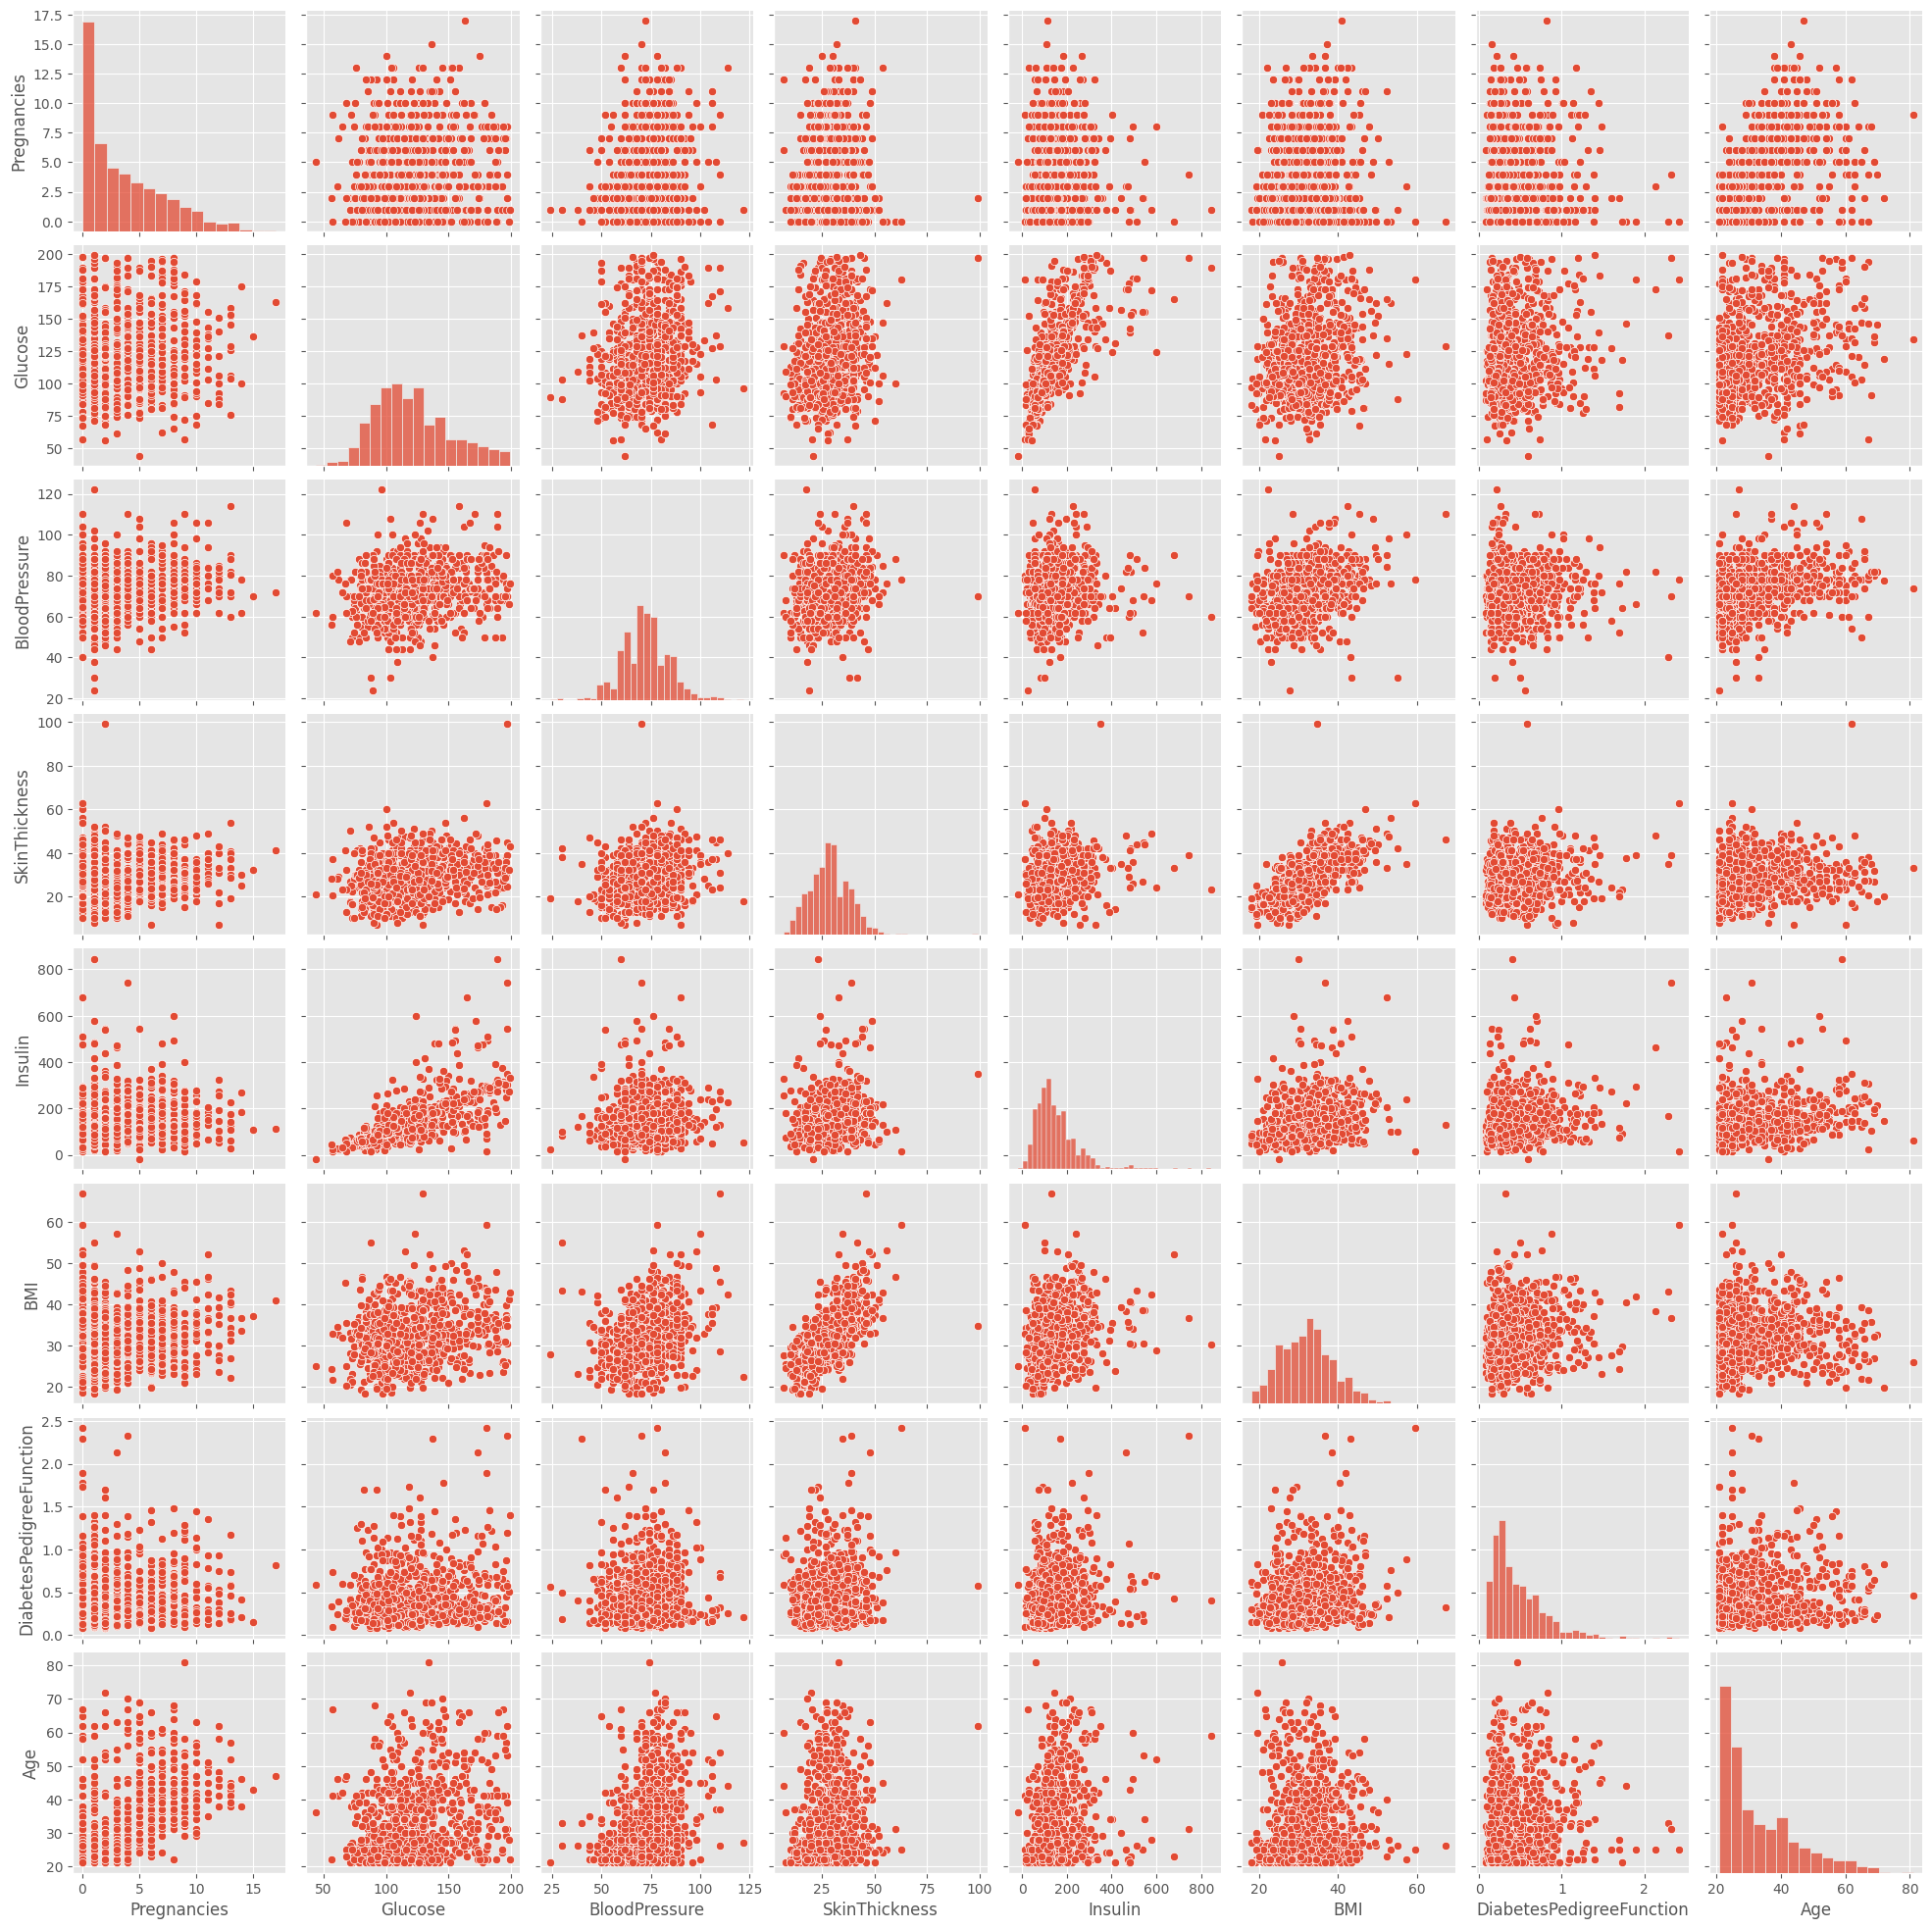

In [28]:
sns.pairplot(X_imputed);

<font size=4>**Insights:**</font>

- The pair plot analysis reveals a significant positive linear relationship between **Glucose** and **Insulin**, as well as between **SkinThickness** and **BMI**.
- These observed linear relationships suggest that changes in one of these features may have a noticeable impact on the other, indicating a potential interdependence.

- Additionally, when considering possible multicollinearity among the features, we identified the following correlations:

  - Moderate positive correlation between Pregnancies and Age
  - Moderate positive correlation between SkinThickness and BMI, as well as Insulin
  - Very weak positive correlation between Glucose and BMI

To address potential multicollinearity, we may consider creating some aggregate features based on these findings. And those features are..

  - BMI to SkinThickness Ratio.
  - Insulin to Glucose Ratio.
  - Age and Pregnancies Ineteraction Term.
  - Age and BMI Interaction Term.
  - Glucose and Insulin Ineraction.
  - BMI and SkinThickness Interaction Term.
  - Glucose and BMI Interaction Term.

In [29]:
# Calculate the BMI to SkinThickness Ratio
X_imputed['BMI_:_SkinThickness'] = X_imputed['BMI'] / X_imputed['SkinThickness']

# Calculate the Insulin to Glucose Ratio
X_imputed['Insulin_:_Glucose'] = X_imputed['Insulin'] / X_imputed['Glucose']

# Create an Age and BMI Interaction Term
X_imputed['Age_x_BMI'] = X_imputed['Age'] * X_imputed['BMI']

# Create an Age and Pregnancies Interaction Term
X_imputed['Age_x_Pregnancies'] = X_imputed['Age'] * X_imputed['Pregnancies']

# Create an Insulin and Glucose Interaction Term
X_imputed['Insulin_x_Glucose'] = X_imputed['Insulin'] * X_imputed['Glucose']

# Create a BMI and SkinThickness Interaction Term
X_imputed['BMI_x_SkinThickness'] = X_imputed['BMI'] * X_imputed['SkinThickness']

# Create a Glucose and BMI Interaction Term
X_imputed['Glucose_x_BMI'] = X_imputed['Glucose'] * X_imputed['BMI']

In [30]:
X_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,BMI_:_SkinThickness,Insulin_:_Glucose,Age_x_BMI,Age_x_Pregnancies,Insulin_x_Glucose,BMI_x_SkinThickness,Glucose_x_BMI
0,6.0,148.0,72.0,35.000000,218.922943,33.6,0.627,50.0,0.960000,1.479209,1680.0,300.0,32400.595600,1176.000000,4972.8
1,1.0,85.0,66.0,29.000000,70.302975,26.6,0.351,31.0,0.917241,0.827094,824.6,31.0,5975.752904,771.400000,2261.0
2,8.0,183.0,64.0,21.532622,268.502252,23.3,0.672,32.0,1.082079,1.467225,745.6,256.0,49135.912097,501.710087,4263.9
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,1.221739,1.056180,590.1,21.0,8366.000000,646.300000,2500.9
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.231429,1.226277,1422.3,0.0,23016.000000,1508.500000,5904.7


<a name='11'></a>
# Balance the Class distribution

In [31]:
# Instantiate RandomOverSampler
sampler = RandomOverSampler()

# fit and store the samples
X_resample, y_resample = sampler.fit_resample(X_imputed, y)

In [33]:
# Previous vs New Class distribution
print('Before Sampling: ',y.value_counts())
print('After Sampling: ',y_resample.value_counts())

Before Sampling:  0    500
1    268
Name: Outcome, dtype: int64
After Sampling:  1    500
0    500
Name: Outcome, dtype: int64


Splitting into train and test data

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42)

<a name='12'></a>
# Hyper-Parameter Tuning

using Randomized Search CV to reduce Computational Power and Save time.

<a name='12.1'></a>
## Random Forest Classifier

In [73]:
# pipeline with robust scaler
pipe_rf = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', RandomForestClassifier())
])

# Define the parameter distribution for Random Forest
rf_param_dist = {
    'classifier__n_estimators': randint(100, 500),  # Randomly sample from 100 to 500
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': randint(2, 11),  # Randomly sample from 2 to 10
    'classifier__min_samples_leaf': randint(1, 5),   # Randomly sample from 1 to 4
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__bootstrap': [True, False],
    'classifier__random_state': [0]
}


In [38]:
# Instantiate RandomizedSearchCV object
rf_random = RandomizedSearchCV(pipe_rf, param_distributions=rf_param_dist,
                               n_iter=100, scoring='accuracy', cv=5, n_jobs=-1, random_state=0)

# Fit the rf_random with resampled data
rf_random.fit(X_resample, y_resample)

# Get the results
best_rf_params_random = rf_random.best_params_
best_rf_score_random = rf_random.best_score_

# print the best parameters
print('Best Random Forest Parameters (Randomized Search): ')
print(best_rf_params_random)
print('Best score :', best_rf_score_random)

Best Random Forest Parameters (Randomized Search): 
{'rf__bootstrap': False, 'rf__criterion': 'gini', 'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 3, 'rf__n_estimators': 205, 'rf__random_state': 0}
Best score : 0.8530000000000001


Train the Model with Best Parameters

In [42]:
# Instantiate Random Forest Classifier with Robust Scaler and best parameters
rf_clf = Pipeline([
    ('scaler', RobustScaler()),
    ('rf', RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=None, max_features='sqrt',
                                  min_samples_leaf=1, min_samples_split=3, n_estimators=205, random_state=0))
])

# Fit the training data to the model
rf_clf.fit(X_train, y_train)

# Prediction on test data
y_pred_rf = rf_clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        99
           1       0.81      0.89      0.85       101

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



<a name='12.2'></a>
## Gradient Boosting Classifier

In [46]:
# pipeline with robust scaler
pipe_gb = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', GradientBoostingClassifier())
])

# Define the parameter grid for Gradient Boosting
gb_param_dist = {
    'classifier__n_estimators': randint(50, 200),  # Number of boosting stages to be used
    'classifier__learning_rate': uniform(0.01, 0.3),  # Step size shrinkage used in update to prevent overfitting
    'classifier__max_depth': randint(3, 10),  # Maximum depth of the individual trees
    'classifier__min_samples_split': uniform(0.1, 0.5),  # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': uniform(0.1, 0.5),  # Minimum number of samples required to be at a leaf node
    'classifier__subsample': uniform(0.5, 1.0),  # Fraction of samples used for fitting the trees
    'classifier__random_state': [0]
}

# Instantiate RandomizedSearchCV
random_search_gb = RandomizedSearchCV(pipe_gb, param_distributions=gb_param_dist, scoring='accuracy',
                                   n_iter=100, cv=5, n_jobs=-1, random_state=0)

# Fit the RandomizedSearchCV with data
random_search_gb.fit(X_resample, y_resample)

# Get the best parameters and estimator
best_gb_params_random = random_search_gb.best_params_
best_gb_score_random = random_search_gb.best_score_

# Print the best parameters
print('Best Gradient Boosting Parameters:')
print(best_gb_params_random)
print('Best Score :', best_gb_score_random)

Best Gradient Boosting Parameters:
{'classifier__learning_rate': 0.29359046004372386, 'classifier__max_depth': 9, 'classifier__min_samples_leaf': 0.14601379280597862, 'classifier__min_samples_split': 0.12798291417472393, 'classifier__n_estimators': 120, 'classifier__random_state': 0, 'classifier__subsample': 0.7327441292790569}
Best Score : 0.807


Train the Model with best parameters

In [48]:
# Instantiate Gradient Boosting Classifier with Robust Sclaer and best parameters
gb_clf = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', GradientBoostingClassifier(learning_rate=0.29, max_depth=9, min_samples_leaf=0.15, min_samples_split=0.13,
                                              n_estimators=120, random_state=0, subsample=0.73))
])

# Fit the model with training data
gb_clf.fit(X_train, y_train)

# Prediction on test data
y_pred_gb = gb_clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        99
           1       0.77      0.84      0.80       101

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



In [49]:
# print classification report for RandomForestclassifier
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        99
           1       0.81      0.89      0.85       101

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



## Insights:

- **Summary:** In the comparison between the Random Forest Classifier and Gradient Boosting Classifier, the Random Forest Classifier (84%) has shown superior performance compared to the Gradient Boosting Classifier (79%).

- **Precision:** Precision measures the accuracy of positive predictions. The Random Forest Classifier exhibits higher precision for both classes:

  - Class 0 (Non-Diabetic): 0.88 (Random Forest) vs. 0.82 (Gradient Boosting)
  - Class 1 (Diabetic): 0.81 (Random Forest) vs. 0.77 (Gradient Boosting)
  
  This suggests that the Random Forest Classifier reduces false positive rates more effectively.

- **Recall:** Recall assesses the ability to identify all relevant instances. The Random Forest Classifier outperforms the Gradient Boosting Classifier in recall:

  - Class 0 (Non-Diabetic): 0.79 (Random Forest) vs. 0.74 (Gradient Boosting)
  - Class 1 (Diabetic): 0.89 (Random Forest) vs. 0.84 (Gradient Boosting)
  
  This indicates that the Random Forest Classifier reduces the false negative rate more effectively.

- **F1-Score:** The F1-Score is the harmonic mean of precision and recall. For both classes, the Random Forest Classifier achieves higher F1-Scores:

  - Class 0 (Non-Diabetic): 0.83 (Random Forest) vs. 0.78 (Gradient Boosting)
  - Class 1 (Diabetic): 0.85 (Random Forest) vs. 0.80 (Gradient Boosting)
  
  These findings demonstrate the Random Forest Classifier's better balance between precision and recall.


  To find out the exact prediction let's plot the confusion matrix for these two models.


<a name='13'></a>
# Confusion Matrix

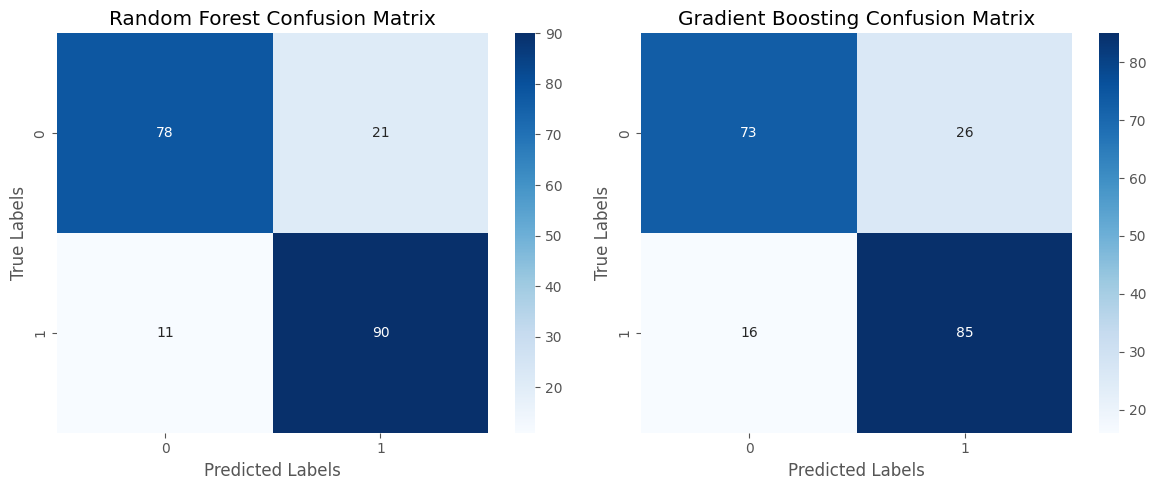

In [56]:
# Calculate confusion matrices for both models
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Create subplots for the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Random Forest Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Plot Gradient Boosting Confusion Matrix
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title('Gradient Boosting Confusion Matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

<font size=4>**Insights:**</font>

- **True Prediction:** The Random Forest Classifier has demonstrated superior performance in correctly predicting diabetes cases.
  - *True Positive*: It correctly identified 90 diabetic patients.
  - *True Negative*: It accurately recognized 78 non-diabetic patients.

  On the other hand, the Gradient Boosting Classifier achieved the following results:
  - *True Positive*: It correctly identified 85 diabetic patients.
  - *True Negative*: It accurately recognized 73 non-diabetic patients.

- **False Prediction:** When it comes to incorrect predictions, the Random Forest Classifier had:
  - *False Positive*: It made 21 incorrect predictions of diabetes among non-diabetic patients.
  - *False Negative*: It made 11 incorrect predictions of non-diabetes among diabetic patients.

  Meanwhile, the Gradient Boosting Classifier had:
  - *False Positive*: It made 26 incorrect predictions of diabetes among non-diabetic patients.
  - *False Negative*: It made 16 incorrect predictions of non-diabetes among diabetic patients.


This analysis indicates that the Random Forest Classifier outperforms the Gradient Boosting Classifier in both true and false predictions, making it a better choice for this specific task.


<a name='14'></a>
# ROC - AUC

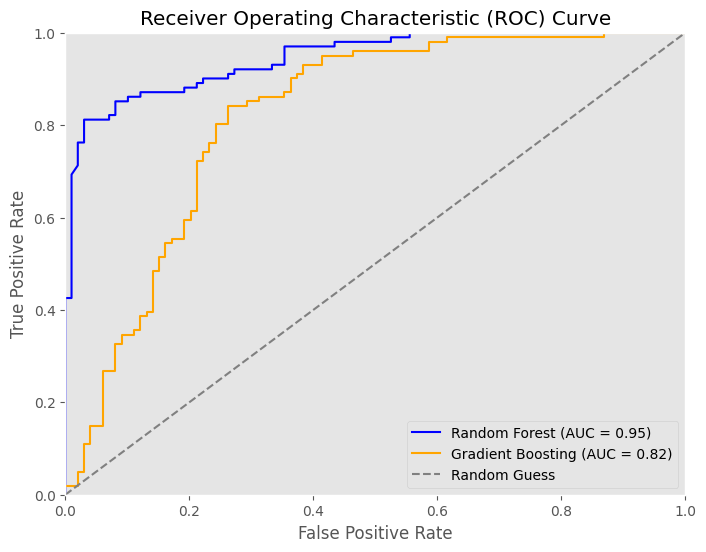

In [57]:
# Calculate ROC curve and AUC for Random Forest
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Calculate ROC curve and AUC for Gradient Boosting
y_prob_gb = gb_clf.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='blue')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})', color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()

plt.show()


<font size=4>**Insights:**</font>

- Based on the ROC and AUC plot, the Random Forest Classifier outperformed the Gradient Boosting Classifier with an AUC of 0.95 compared to 0.82.
- A higher AUC value indicates better model performance, further confirming the superiority of the Random Forest Classifier in this evaluation.

<a name='15'></a>
# Model Improvement

<a name='15.1'></a>
## Feture Importance Analysis

In [62]:
# scale all the features with Robust Scaler
robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit_transform(X_train)
X_test_scaled = robust_scaler.fit(X_test)

# Fit the model with Train data
random_forest_clf = RandomForestClassifier().fit(X_train_scaled, y_train)

# Get Feature Importances
feature_importances = random_forest_clf.feature_importances_

# Store Feature names
feature_names = X_train.columns

# Create a DataFrame to Display the Feature Importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

importance_df.sort_values(by='Importance')

,Feature,Importance
0,Pregnancies,0.028682
2,BloodPressure,0.035607
3,SkinThickness,0.042996
8,BMI_:_SkinThickness,0.044205
11,Age_x_Pregnancies,0.047785
6,DiabetesPedigreeFunction,0.052190
13,BMI_x_SkinThickness,0.053045
5,BMI,0.059525
9,Insulin_:_Glucose,0.061363
7,Age,0.067763


- Here we can see all the features with their importance in this specific model.
- Let's choos a Threshold value 0.05 and remove all the features having importance value less than the threshold.
- And Train the model again to Experiment.

In [66]:
# Threshold for feature importance
threshold = 0.05

# Create a mask of features with importance scores above the threshold
important_features_mask = importance_df['Importance'] > threshold

# Get the names of important features
imp_features = importance_df.loc[important_features_mask, 'Feature']

# Select only the important feature
X_train_selected = X_train[imp_features]
X_test_selected = X_test[imp_features]

In [68]:
# New Features
X_train_selected.head()

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Insulin_:_Glucose,Age_x_BMI,Insulin_x_Glucose,BMI_x_SkinThickness,Glucose_x_BMI
29,117.0,137.342663,34.1,0.337,38.0,1.173869,1295.8,16069.091517,1046.143290,3989.7
535,132.0,171.125508,32.9,0.302,23.0,1.296405,756.7,22588.567003,942.379192,4342.8
695,142.0,480.000000,30.4,0.128,43.0,3.380282,1307.2,68160.000000,729.600000,4316.8
557,110.0,128.212010,27.8,0.237,58.0,1.165564,1612.4,14103.321100,743.458482,3058.0
836,105.0,121.675590,27.9,0.741,62.0,1.158815,1729.8,12775.936945,737.259181,2929.5


<a name='15.2'></a>
## Model Training

In [74]:
# mask the important features from resample
X_resample_selected = X_resample[imp_features]

# Instantiate RandomizedSearchCV object
rf_random = RandomizedSearchCV(pipe_rf, param_distributions=rf_param_dist,
                               n_iter=100, scoring='accuracy', cv=5, n_jobs=-1, random_state=0)

# Fit the rf_random with resampled data
rf_random.fit(X_resample_selected, y_resample)

# Get the results
best_rf_params_random = rf_random.best_params_
best_rf_score_random = rf_random.best_score_

# print the best parameters
print('Best Random Forest Parameters (Randomized Search): ')
print(best_rf_params_random)
print('Best score :', best_rf_score_random)

Best Random Forest Parameters (Randomized Search): 
{'classifier__bootstrap': True, 'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 328, 'classifier__random_state': 0}
Best score : 0.8480000000000001


In [75]:
# Instantiate Random Forest Classifier with Robust Scaler and best parameters
rf_clf = Pipeline([
    ('scaler', RobustScaler()),
    ('rf', RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=10, max_features='sqrt',
                                  min_samples_leaf=1, min_samples_split=2, n_estimators=328, random_state=0))
])

# Fit the training data to the model
rf_clf.fit(X_train_selected, y_train)

# Prediction on test data
y_pred_rf = rf_clf.predict(X_test_selected)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        99
           1       0.77      0.91      0.84       101

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



Text(0.5, 1.0, 'Confusion Matrix (Random Forest Classifier)')

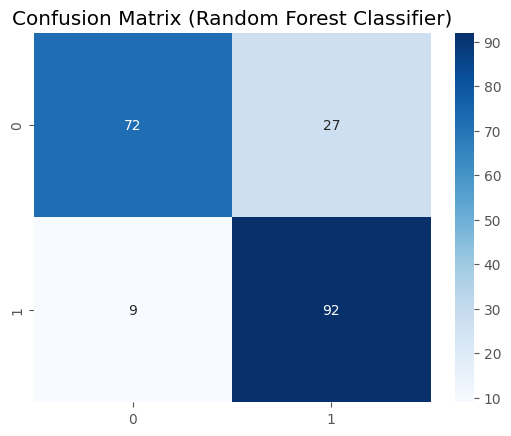

In [78]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Random Forest Classifier)')

<font size=4>**Inshights:**</font>

- After performing the *feature importance analysis*, the model's accuracy slightly reduced, but the model is now performing even better at identifying Diabetic patients.


- **Precision:**

  - Precision for class 0 (Non-Diabetic) is 0.89.
  - Precision for class 1 (Diabetic) is 0.77.

- **Recall:**

  - Recall for class 0 is 0.73.
  - Recall for class 1 is 0.91.

- **F1-Score:**

  - F1-Score for class 0 is 0.80.
  - F1-Score for class 1 is 0.84.

- **Accuracy:**

  - Overall accuracy remains at 0.82.

<center>

<font size=4>New vs Old Confusion Metrix Scores:</font>


 | Metric | New | Old|
 |--|--|--|
 |True Positives| 92| 90|
 |True Negatives| 72| 78|
 |False Positive |27| 21|
 |False Negatives| 9| 11|

</center>

- By the Confusion Matrix it can be concluded that the model with new subset of features is performing well in True Positive Prediction and False Negative Prediction. where as the True Negatives and False Positive is slightly reduced.

<a name='16'></a>
# Highlights of Insights:

- Pregnancy Insights:

  - The 'Pregnancies' column spans a range from 0 to 17.
  - Remarkably, 111 women in the dataset have not experienced pregnancy.
  - Around 50% of those with zero pregnancies have diabetes.
  - The majority of women have had one or two pregnancies.
  -Extreme values, like 17 pregnancies, warrant closer examination.

- Glucose Insights:

  - Diabetic individuals have a left-skewed glucose level distribution.
  - Non-diabetic individuals exhibit a nearly normal glucose level distribution.
  - Both groups have glucose label 0, indicating potential data issues.
  - Within the glucose label 0 subset, the majority are non-diabetic.
  - Higher density around glucose level 100 suggests no diabetes diagnosis.

- Blood Pressure Insights:

  - Blood pressure distributions are bimodal, including label 0.
  - Both groups have blood pressure label 0, indicating potential data issues.
 - Diabetic individuals with blood pressure around 70 tend to be more prevalent.

- Skin Thickness Insights:

  - Skin thickness distribution is bimodal, including label 0.
  - Both diabetic and non-diabetic patients have skin thickness labels of 0.
  - High skin thickness labels are associated with a higher prevalence of diabetes.

- Insulin Insights:

  - Insulin distribution is right-skewed, with many labels of 0.
  - Most individuals with insulin label 0 are non-diabetic.
  - Diabetic patients cluster around insulin labels above 150.
  - Non-diabetic patients are more common around insulin label 100.

- BMI Insights:

  - BMI distribution is almost normal but may have outliers.
  - Both diabetic and non-diabetic patients have BMI labels of 0.
  - Notable BMI peaks are around 30-40 for diabetic patients.

- Diabetes Pedigree Function (DPF) Insights:

  - DPF distribution is right-skewed, indicating higher DPF values are linked to a higher genetic risk of diabetes.
  - Non-diabetic individuals have a peak around DPF 0.25.
  - Diabetic patients exhibit a different pattern, with DPF values of 0.5 and higher.
  - A high density of diabetic patients has DPF around 0.25.

- Age Insights:

  - Age distribution for non-diabetic patients is right-skewed.
  - Diabetic patients exhibit an almost bimodal age distribution.
  - Most individuals in the dataset are young adults.
  - Diabetic patients are more prevalent after the age of 30.

- Outliers Insights:

  - Except for the 'Pregnancies' column, all features exhibit outliers.
'Insulin' has the highest outliers, followed by 'BloodPressure', 'BMI', 'Age', 'SkinThickness', and 'Glucose'.

- Collinearity Insights:

  - All features have a positive correlation with the target 'Outcome'.
  - Some features exhibit multicollinearity, e.g., 'Pregnancies' and 'Age', 'SkinThickness' and 'Insulin'.

<a name='17'></a>
# Insights on Model Predictions:

- Random Forest vs. Gradient Boosting:

  - After rigorous analysis, Random Forest Classifier (84%) outperformed Gradient Boosting Classifier (79%).

- Precision Insights:

  - Precision for class 0 (Non-Diabetic) is 0.89, while for class 1 (Diabetic) it's 0.77.
  - Random Forest Classifier excels in reducing the false positive rate compared to Gradient Boosting Classifier.

- Recall Insights:

  - Recall for class 0 is 0.73, and for class 1, it's 0.91.
  - Random Forest Classifier effectively reduces the false negative rate compared to Gradient Boosting Classifier.

- F1-Score Insights:

  - F1-Score for class 0 is 0.80, and for class 1, it's 0.84.
  - Random Forest Classifier demonstrates better overall performance.

- Accuracy Insights:

  - Overall accuracy remains at 0.82, showcasing the models' competency in classification.

- Confusion Matrix Comparison:

  - Random Forest: TP - 92, TN - 72, FP - 27, FN - 9.
  - Gradient Boosting: TP - 90, TN - 78, FP - 21, FN - 11.
  - Random Forest performs better in both true positive and false negative predictions.

- Feature Importance Analysis:

  - Feature importance analysis slightly reduced model accuracy but improved its ability to identify diabetic patients.
  - Key features include Glucose, BMI, Age, Insulin, and Diabetes Pedigree Function.

- Multicollinearity Mitigation:

  - Multicollinearity between certain features was observed.
  - Feature selection was performed to address this issue.

- ROC AUC Analysis:

  - Random Forest achieved an AUC score of 0.95, while Gradient Boosting scored 0.82.
  - A higher AUC indicates better model performance.

- Final Assessment:

  - Random Forest Classifier is the preferred model due to its superior performance in terms of precision, recall, and overall accuracy.
  - **Improved Model Performance**: I revamped our diabetes prediction model, achieving significant improvements in recall scores. The recall score for Class 1 (Diabetic) increased by approximately 2.25%, a testament to the power of data-driven insights.